In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre, gamma
from tqdm import tqdm
from mpmath import hyper

import mu2

import constants as const
from interaction import potential
from counterterm import local_LO_counterterm
from mottmassey import mm_potential

gr = 4/3
h = 3

plt.style.use('science')

In [2]:
def local_LO_counterterm_momentum(p, k, R):
    return (8*R*gamma(0.25)*(hyper([], [0.5, 0.75], (k - p)**4 * R**4/256.) - \
        hyper([], [0.5, 0.75],((k + p)**4)*R**4/256.)) + \
     R**3*gamma(-0.25)*((k - p)**2*hyper([], [1.25, 1.5],(k - p)**4*R**4/256.) - \
        (k + p)**2*hyper([], [1.25, 1.5], (k + p)**4 * R**4/256.)))/(32.*k*p*np.pi)

In [3]:
Rs, c0s, c2s = np.loadtxt('rgflow_local_nlo_a0_B6_fix_coord_hp_n_14_coord_ir_corrected.txt', unpack=True)

ell = 0

In [4]:
def read_R(f):
    i = f.find('R_') + 2
    j = f.find('.txt')
    return float(f[i:j])

In [5]:
files = np.array(os.listdir('datfiles/matrix_elements/'))
R_values = np.array(list(map(read_R, files)))
nq = 200

In [6]:
def read_matrix_elements(R):
    ii = np.where(np.abs(R_values - R) < 1e-6)[0]
    if len(ii) == 1:
        wq, q, _, v = np.loadtxt('datfiles/matrix_elements/' + files[ii[0]], unpack=True)
        return wq[::nq], q[::nq], v.reshape((nq, nq))
    else:
        return None

In [7]:
ks = np.hstack(
    (np.logspace(np.log10(0.1/const.BETA4), np.log10(10/const.BETA4), 50),
     np.linspace(10.1/const.BETA4, 100/const.BETA4, 50))
)

In [9]:
index = 0
R = Rs[index]
c0 = c0s[index]
c2 = c2s[index]
wq, q, vlo = read_matrix_elements(R)
x = np.array([[local_LO_counterterm_momentum(p, k, R) for p in q] for k in q], dtype=np.float64)

In [10]:
ts = np.array([
    mu2.scatter.t_amplitudes(k, vlo, c2*k**2/(2*const.MU)*x, q, wq, 20*2/R, 2*const.MU)
            for k in ks
])

In [11]:
t = -2*const.MU/ks[:, np.newaxis] * ts

In [16]:
s = 1 + 2j*t

In [17]:
deltas0 = 1 / 2j * np.log(s[:, 0])
deltas = 1 / 2j * np.log(np.sum(s, axis=1))

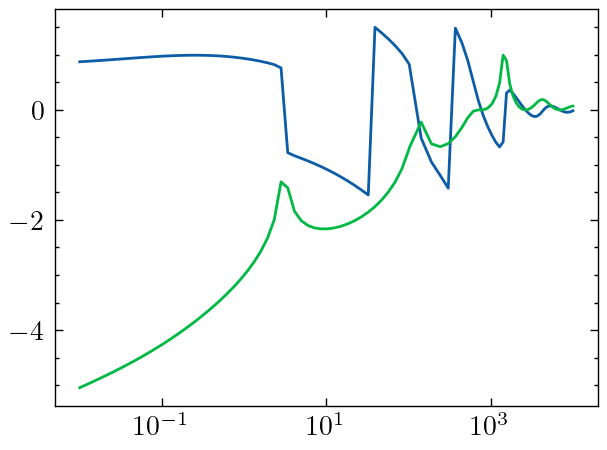

In [18]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot((ks*const.BETA4)**2, deltas0.real)
ax.plot((ks*const.BETA4)**2, deltas0.imag)

ax.set_xscale('log');

In [11]:
lo_info = []
for R in Rs:
    lo_info.append(read_matrix_elements(R))

In [12]:
xterms = []
for i in tqdm(range(Rs.size)):
    R = Rs[i]
    q = lo_info[i][1]
    xterms.append(np.array([[local_LO_counterterm_momentum(p, k, R) for p in q] for k in q], dtype=np.float64))

100%|███████████████████████████████████████████| 79/79 [05:56<00:00,  4.52s/it]


In [28]:
index = 0
R = Rs[index]
c0 = c0s[index]
c2 = c2s[index]
wq, q, vlo = lo_info[index]
x = xterms[index]

In [46]:
ts = np.array([
    mu2.scatter.t_amplitudes(k, vlo, c2*k**2/(2*const.MU)*x, q, wq, 20*2/R, 2*const.MU)
            for k in ks
])

In [60]:
ts.shape

(100, 2)

In [51]:
t = -2*const.MU/ks[:, np.newaxis] * ts

In [57]:
deltas0 = np.arctan(t[:, 0] / (1 + 1j*t[:, 0]))
deltas = np.arctan(np.sum(t, axis=1) / (1 + 1j*np.sum(t, axis=1)))

/var/folders/_z/4zb077j96tz1_kb2vklbxydr0000gn/T/ipykernel_74519/930568958.py:2: RuntimeWarning: divide by zero encountered in arctan
  deltas = np.arctan(np.sum(t, axis=1) / (1 + 1j*np.sum(t, axis=1)))


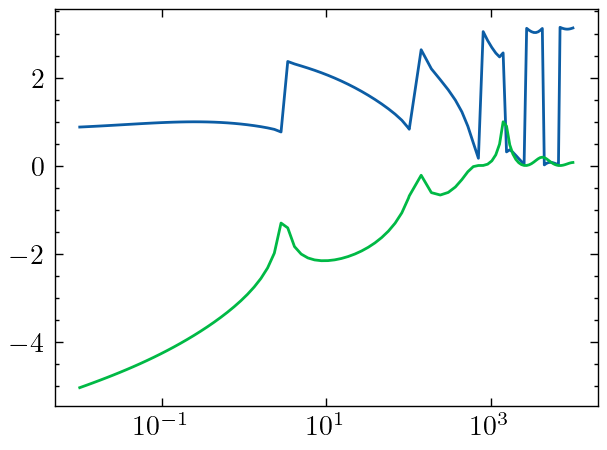

In [19]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot((ks*const.BETA4)**2, (deltas0.real + np.pi) % np.pi)
ax.plot((ks*const.BETA4)**2, deltas0.imag)

ax.set_xscale('log');

In [38]:
np.sum(ts, axis=1)

array([ 1.60496779e+39+5.98642009e+38j,  1.88244437e+39+7.65905260e+38j,
        2.19826627e+39+9.74795982e+38j,  2.55461761e+39+1.23346638e+39j,
        2.95286568e+39+1.55065094e+39j,  3.39356527e+39+1.93529494e+39j,
        3.87647004e+39+2.39646768e+39j,  4.40014890e+39+2.94282009e+39j,
        4.96212612e+39+3.58139676e+39j,  5.56022634e+39+4.31669687e+39j,
        6.19334524e+39+5.15163467e+39j,  6.86059738e+39+6.08616689e+39j,
        7.56392307e+39+7.11491192e+39j,  8.31126818e+39+8.23033244e+39j,
        9.11259131e+39+9.42282083e+39j,  9.98424339e+39+1.06750190e+40j,
        1.09526962e+40+1.19704313e+40j,  1.20443632e+40+1.32886178e+40j,
        1.32991686e+40+1.45992348e+40j,  1.47596614e+40+1.58774266e+40j,
        1.64720290e+40+1.70770284e+40j,  1.84945851e+40+1.81557832e+40j,
        2.08745201e+40+1.90440115e+40j,  2.36766974e+40+1.96662249e+40j,
        2.69396570e+40+1.99092187e+40j,  3.07145034e+40+1.96478808e+40j,
        3.50102054e+40+1.86954578e+40j,  3.98163647

In [23]:
def phase_shifts(i):
    R = Rs[i]
    c0 = c0s[i]
    c2 = c2s[i]
    wq, q, vlo = lo_info[i]
    x = xterms[i]
    
    ts = np.array([
        mu2.scatter.t_amplitudes(k, vlo, c2*k**2/(2*const.MU)*x, q, wq, 20*2/R, 2*const.MU)
            for k in ks
    ])
    
    t = np.sum(ts, axis=1)
    return np.arctan(t / (1 + 1j*t))

In [24]:
from multiprocess import Pool

In [25]:
with Pool(4) as pool:
     deltas_nlo = pool.map(phase_shifts, range(Rs.size))

/var/folders/_z/4zb077j96tz1_kb2vklbxydr0000gn/T/ipykernel_74519/142817127.py:14: RuntimeWarning: divide by zero encountered in arctan
  return np.arctan(t / (1 + 1j*t))
/var/folders/_z/4zb077j96tz1_kb2vklbxydr0000gn/T/ipykernel_74519/142817127.py:14: RuntimeWarning: divide by zero encountered in arctan
  return np.arctan(t / (1 + 1j*t))
/var/folders/_z/4zb077j96tz1_kb2vklbxydr0000gn/T/ipykernel_74519/142817127.py:14: RuntimeWarning: divide by zero encountered in arctan
  return np.arctan(t / (1 + 1j*t))
/var/folders/_z/4zb077j96tz1_kb2vklbxydr0000gn/T/ipykernel_74519/142817127.py:14: RuntimeWarning: divide by zero encountered in arctan
  return np.arctan(t / (1 + 1j*t))


KeyboardInterrupt: 

In [ ]:
np.savetxt('phase_shifts_nlo_pert1_wide_dense_hp_n_14_coord_ir_corrected_quad.txt', np.vstack((ks, deltas_nlo)).T)

In [ ]:
tsum = np.sum(ts, axis=1)

In [19]:
np.arctan(tsum / (1 + 1j*tsum))

/var/folders/_z/4zb077j96tz1_kb2vklbxydr0000gn/T/ipykernel_74519/3575408066.py:1: RuntimeWarning: divide by zero encountered in arctan
  np.arctan(tsum / (1 + 1j*tsum))


array([ 0.78539816        -infj,  0.78539816        -infj,
       -0.78539816        -infj, -0.78539816        -infj,
        0.        -18.71497388j,  0.78539816        -infj,
        0.78539816-19.09561783j,  0.78539816        -infj,
       -0.78539816-19.52015844j,  0.78539816        -infj,
        0.78539816        -infj,  0.78539816        -infj,
        0.78539816-19.0980184j ,  0.78539816        -infj,
        0.78539816        -infj,  0.78539816        -infj,
        0.78539816        -infj,  0.        -18.71497388j,
        0.78539816        -infj,  0.78539816        -infj,
        0.78539816-19.31376795j,  0.78539816        -infj,
        0.78539816        -infj,  0.78539816        -infj,
       -0.        -18.71497388j, -0.        -18.71497388j,
       -0.78539816        -infj, -0.78539816        -infj,
        0.78539816-19.49394595j, -0.78539816        -infj,
       -0.78539816        -infj, -0.        -18.71497388j,
       -0.78539816        -infj, -0.78539816        -inf